In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import networkx as nx
from scipy.cluster.hierarchy import linkage, dendrogram
from mpl_toolkits.mplot3d import Axes3D
import itertools

# Function to process text and calculate word frequency
def process_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # Preprocess text (you may need to adjust this based on your specific requirements)
    words = [word.lower() for line in lines for word in line.split()]

    # Calculate word frequencies
    word_freq = Counter(words)

    return word_freq

# Function to compare characters and calculate cosine similarity
def compare_characters_cosine_similarity(character1_path, character2_path):
    # Process text for each character
    word_freq_char1 = process_text(character1_path)
    word_freq_char2 = process_text(character2_path)

    # Get the unique words from both characters
    all_words = set(word_freq_char1.keys()) | set(word_freq_char2.keys())

    # Create vectors for cosine similarity calculation
    vector_char1 = np.array([word_freq_char1.get(word, 0) for word in all_words])
    vector_char2 = np.array([word_freq_char2.get(word, 0) for word in all_words])

    # Reshape vectors to be 2D arrays
    vector_char1 = vector_char1.reshape(1, -1)
    vector_char2 = vector_char2.reshape(1, -1)

    # Calculate cosine similarity
    similarity = cosine_similarity(vector_char1, vector_char2)[0, 0]

    return similarity

# Characters to compare
characters = ['Chandler', 'Ross', 'Joey', 'Monica', 'Rachel', 'Phoebe']

# Directory for Season 1 character lines
season1_directory = '/home/jesse/code/Self_Learning/Python/Data_Science/Friends_analysis/Full_seasonwise/Season_1'

# Create a matrix to store cosine similarities
cosine_similarity_matrix = np.zeros((len(characters), len(characters)))

# Compare characters and fill the matrix
for i, char1 in enumerate(characters):
    for j, char2 in enumerate(characters):
        char1_path = os.path.join(season1_directory, f'{char1}_lines.txt')
        char2_path = os.path.join(season1_directory, f'{char2}_lines.txt')
        cosine_similarity_matrix[i, j] = compare_characters_cosine_similarity(char1_path, char2_path)

# Get character pairs and similarities
character_pairs = []
similarities = []

for i, char1 in enumerate(characters):
    for j, char2 in enumerate(characters):
        character_pairs.append(f'{char1} - {char2}')
        similarities.append(cosine_similarity_matrix[i, j])


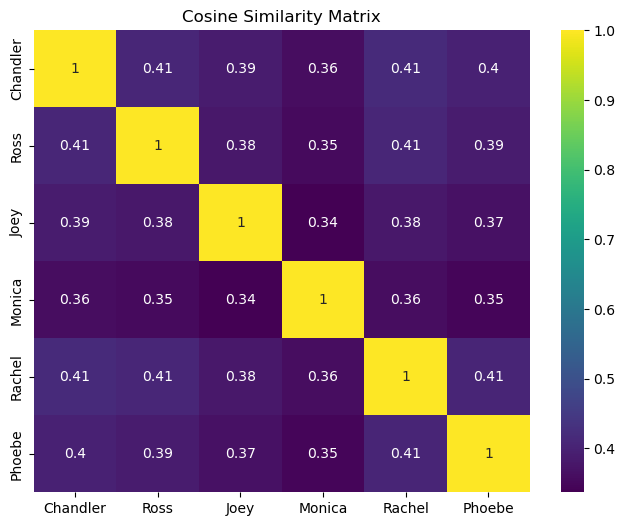

In [2]:
# Create a heatmap for the cosine similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_similarity_matrix, annot=True, cmap='viridis', xticklabels=characters, yticklabels=characters)
plt.title('Cosine Similarity Matrix')
plt.show()

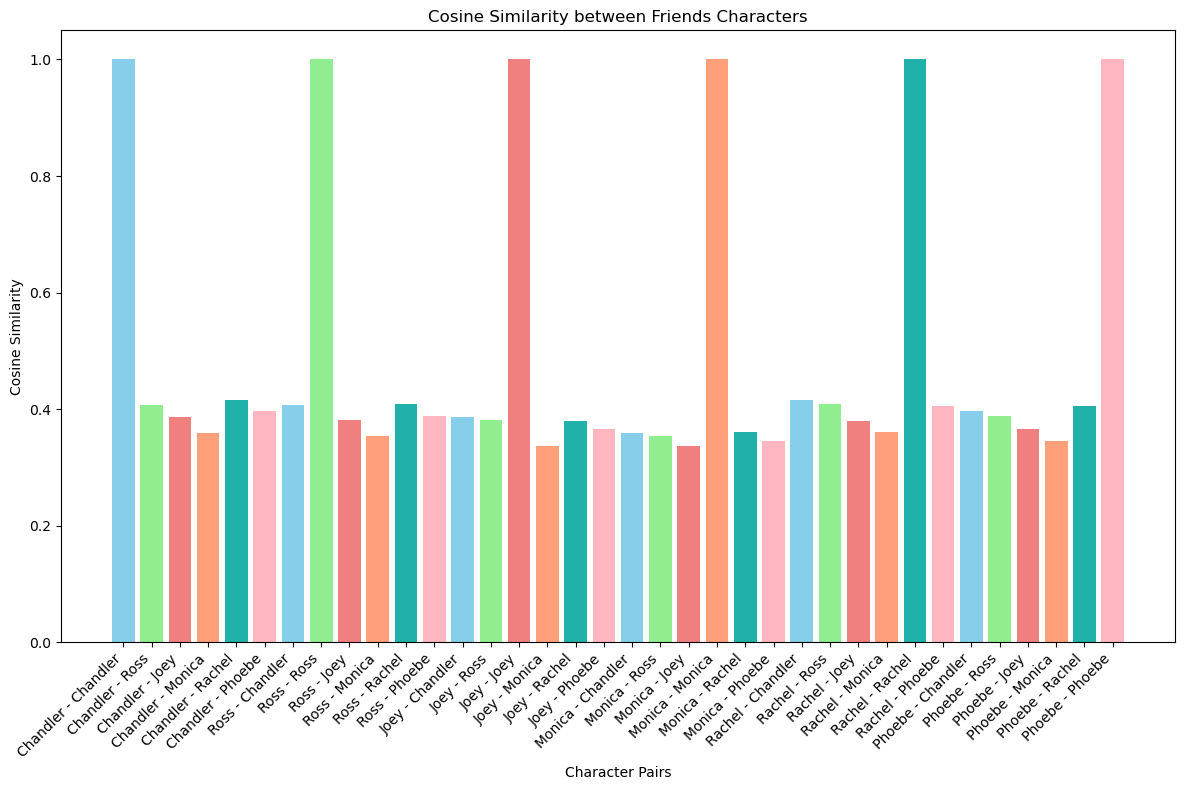

In [3]:
# Define colors for each character pair
bar_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen', 'lightpink']

# Plotting bar chart for cosine similarities with different colors
plt.figure(figsize=(12, 8))
plt.bar(character_pairs, similarities, color=bar_colors)
plt.xlabel('Character Pairs')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity between Friends Characters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


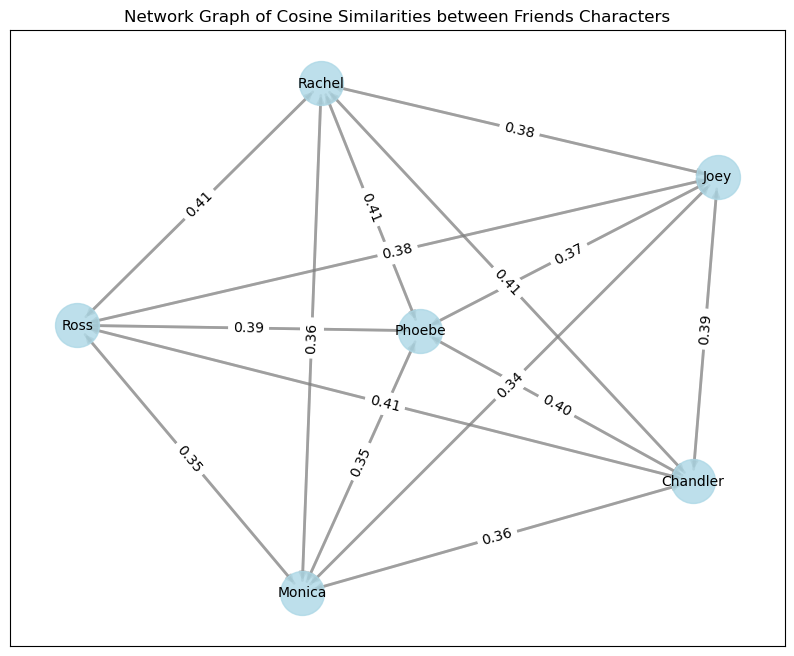

In [4]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for character in characters:
    G.add_node(character)

# Add edges with weights (cosine similarities)
for i, char1 in enumerate(characters):
    for j, char2 in enumerate(characters):
        if i != j:
            weight = cosine_similarity_matrix[i, j]
            G.add_edge(char1, char2, weight=weight)

# Draw the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Set layout for the graph
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Add edge labels with weights
edge_labels = {(char1, char2): f'{weight:.2f}' for char1, char2, weight in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Network Graph of Cosine Similarities between Friends Characters')
plt.show()


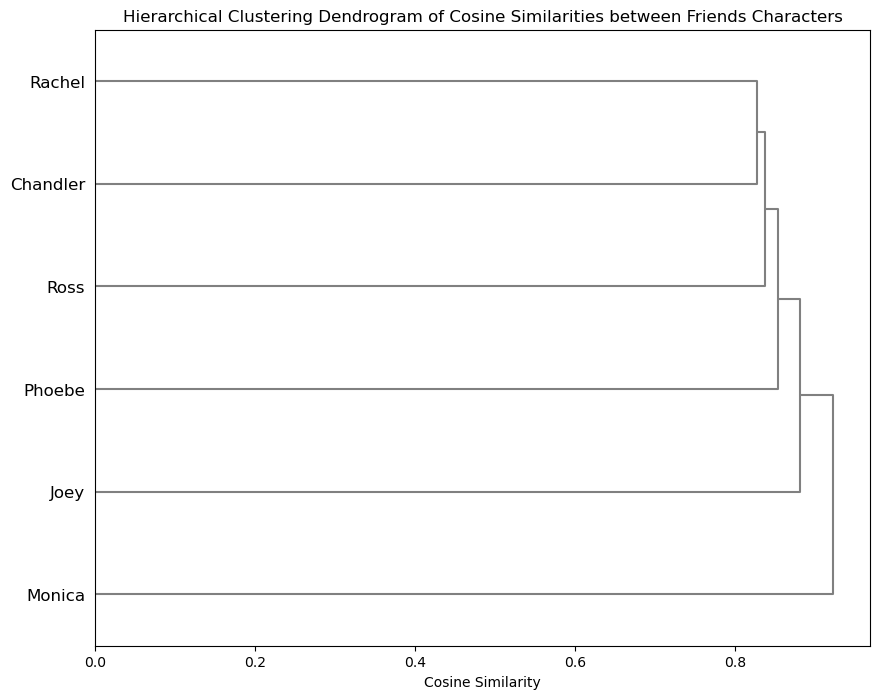

In [5]:
# Calculate the linkage matrix using hierarchical clustering
linkage_matrix = linkage(cosine_similarity_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix, labels=characters, orientation='right', color_threshold=0.7, above_threshold_color='gray')

plt.title('Hierarchical Clustering Dendrogram of Cosine Similarities between Friends Characters')
plt.xlabel('Cosine Similarity')
plt.show()


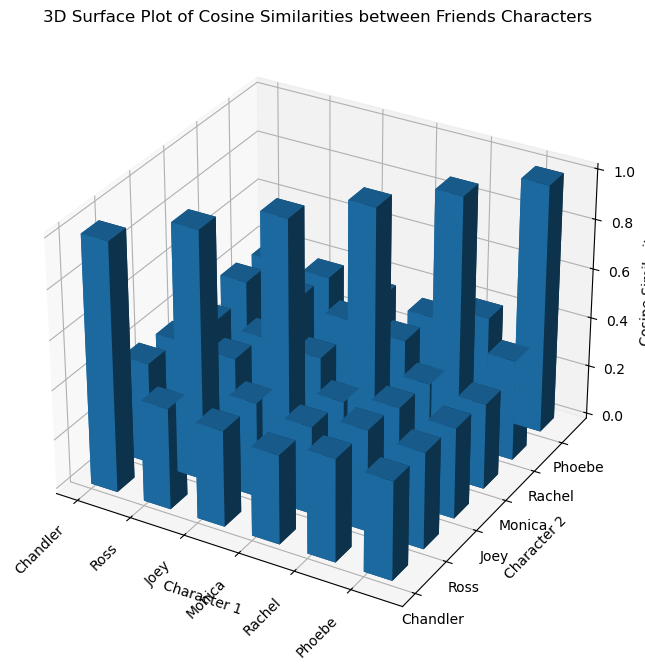

In [6]:
# Plot the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for characters
x, y = np.meshgrid(range(len(characters)), range(len(characters)))
x = x.flatten()
y = y.flatten()

# Plot the surface
ax.bar3d(x, y, np.zeros_like(x), 0.5, 0.5, cosine_similarity_matrix.flatten(), shade=True)

# Customize the plot
ax.set_xticks(range(len(characters)))
ax.set_yticks(range(len(characters)))
ax.set_xticklabels(characters, rotation=45, ha='right')
ax.set_yticklabels(characters)
ax.set_xlabel('Character 1')
ax.set_ylabel('Character 2')
ax.set_zlabel('Cosine Similarity')

plt.title('3D Surface Plot of Cosine Similarities between Friends Characters')
plt.show()


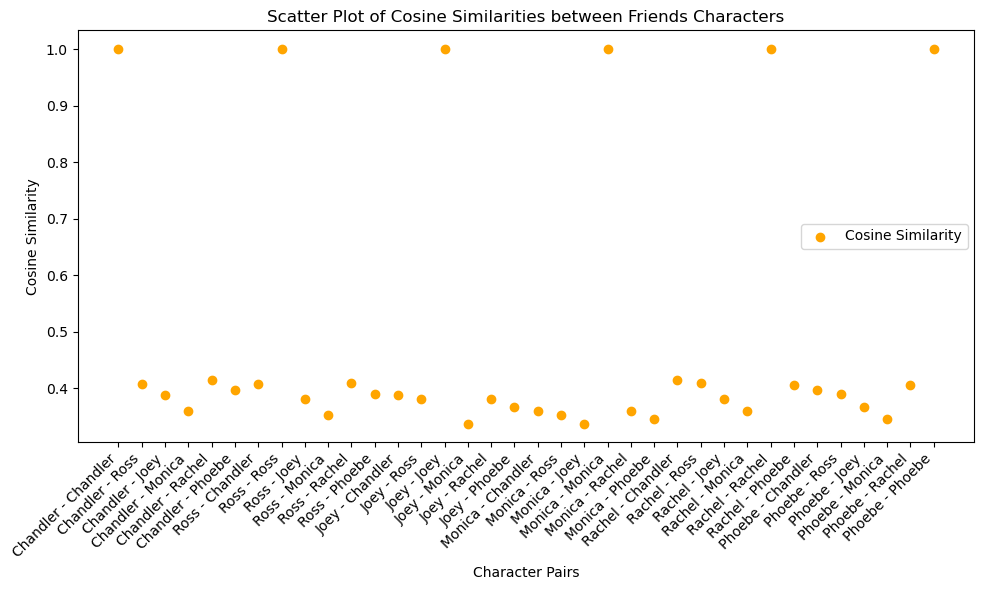

In [7]:
# Flatten the cosine similarity matrix
cosine_similarity_values = cosine_similarity_matrix.flatten()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cosine_similarity_values)), cosine_similarity_values, c='orange', marker='o', label='Cosine Similarity')

# Customize the plot
plt.xticks(range(len(character_pairs)), character_pairs, rotation=45, ha='right')
plt.xlabel('Character Pairs')
plt.ylabel('Cosine Similarity')
plt.title('Scatter Plot of Cosine Similarities between Friends Characters')
plt.legend()
plt.tight_layout()
plt.show()

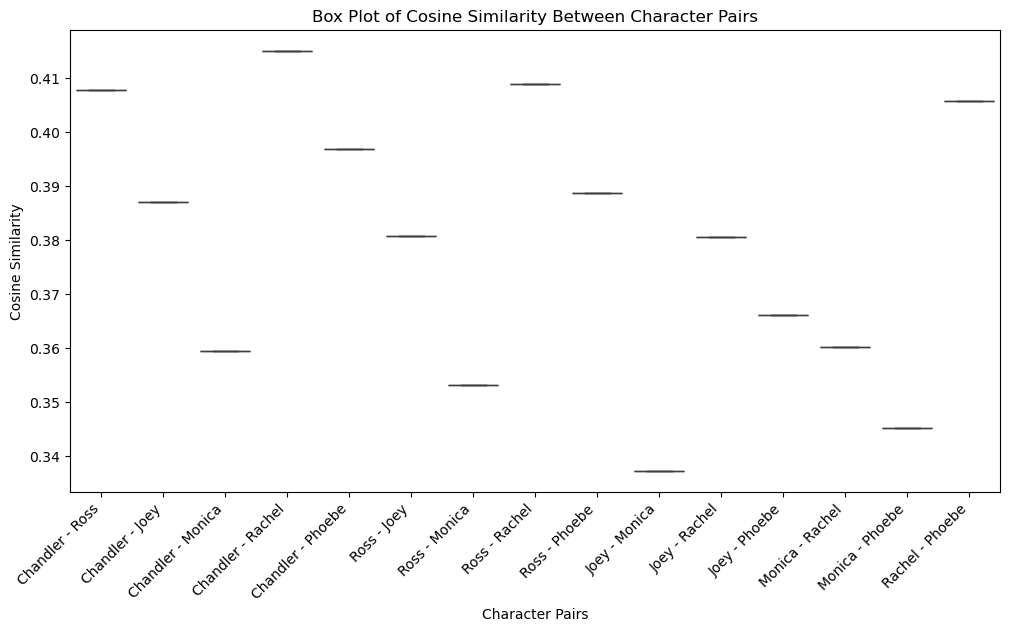

In [8]:
# Flatten the upper triangular part of the cosine similarity matrix
cosine_similarity_values = cosine_similarity_matrix[np.triu_indices(len(characters), k=1)]

# Generate character pairs for x-axis labels
character_pairs = [f'{char1} - {char2}' for char1, char2 in itertools.combinations(characters, 2)]

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=character_pairs, y=cosine_similarity_values)
plt.title('Box Plot of Cosine Similarity Between Character Pairs')
plt.xlabel('Character Pairs')
plt.ylabel('Cosine Similarity')
plt.xticks(rotation=45, ha='right')
plt.show()